# Get Thermodynamic Data From NIST

## Importing Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nist_webbook_utils import generate_url, query_nist_webbook, parse_to_dataframe, get_nist_data

## Testing Our NIST WebBook Utilities

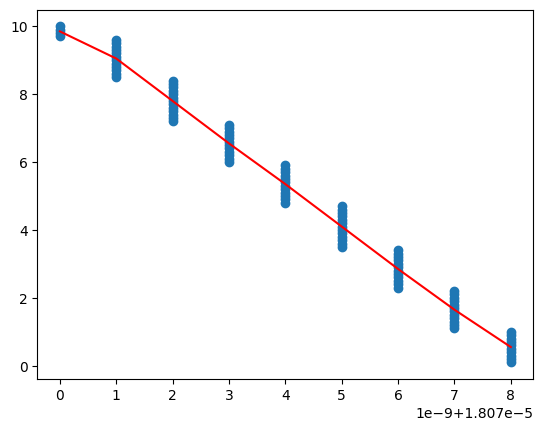

In [2]:
# Generate URL for water at 300 K and 0.1-10 bar
water_url = generate_url(
    substance_id="C7732185",  # CAS Registry Number for water (7732-18-5)
    temperature=300,          # Temperature in Kelvin
    p_low=0.1,                # Lower pressure in bar
    p_high=10.0,              # Upper pressure in bar
    p_increment=0.1,          # Pressure increment in bar
    digits=5
)

# Query NIST WebBook for water data
water_query = query_nist_webbook(water_url)

# Parse query results into a pandas DataFrame
df = parse_to_dataframe(water_query)

# Group by unique volume values and calculate the average pressure for each
processed_df = df.groupby('Volume (m3/mol)', as_index=False)['Pressure (bar)'].mean()

# Plot the data
plt.plot(df['Volume (m3/mol)'], df['Pressure (bar)'], 'o', label='Data Points')
plt.plot(processed_df['Volume (m3/mol)'], processed_df['Pressure (bar)'], 'r-', label='Average Pressure')

Processes the DataFrame to create a new DataFrame with a single pressure value (e.g., the average pressure) for each distinct volume value.

## Corresponding States

In [6]:
critical_points = {
    'Ar':  {'Tc': 150.86, 'Pc':  48.9805, 'rhoc': 13.41},
    'O2':  {'Tc': 154.58, 'Pc':  50.43,   'rhoc': 13.60},
    'H2O': {'Tc': 647.,   'Pc': 220.64,   'rhoc': 17.9},
    'CO2': {'Tc': 304.18, 'Pc':  73.80,   'rhoc': 10.6}
}

cas_registry_numbers = {
    'Ar': '7440-37-1',
    'O2':  '7782-44-7',
    'H2O': '7732-18-5',
    'CO2': '124-38-9'
}

names = {
    'Ar': 'argon',
    'O2': 'oxygen',
    'H2O': 'water',
    'CO2': 'carbon-dioxide'
}

Tr_values = np.arange(0.9, 2.1, 0.1).round(1)
pr_low = 0.01
pr_high = 20.00
p_increment = 1.0

## Get Thermodynamic Data for Corresponding States

In [5]:
path = '/Users/robertwexler/PycharmProjects/chem-402-5020/book/_static/section-04'
for substance, properties in critical_points.items():
    Tc = properties['Tc']
    Pc = properties['Pc']
    rhoc = properties['rhoc']
    Vmc = 1 / rhoc
    substance_id = "C" + cas_registry_numbers[substance].replace('-', '')
    substance_name = names[substance]
    for Tr in Tr_values:
        T = Tr * Tc
        p_low = np.ceil(pr_low * Pc)
        p_high = np.floor(pr_high * Pc)
        df = get_nist_data(substance_id, T, p_low, p_high, p_increment)

        # Add substance, substance_id, and substance_name columns to the DataFrame
        df['substance'] = substance
        df['substance_id'] = substance_id
        df['substance_name'] = substance_name

        # Add critical properties to the DataFrame
        df['Tc'] = Tc
        df['Pc'] = Pc
        df['rhoc'] = rhoc
        df['Vmc'] = Vmc

        # Calculate reduced properties
        df['Tr'] = T / Tc
        df['Pr'] = df['Pressure (bar)'] / Pc
        df['Vmr'] = df['Volume (m3/mol)'] / Vmc

        filename = f'isothermal-properties-for-{substance_name}-Tr={Tr:.1f}.csv'
        df.to_csv(os.path.join(path, filename), index=False)

## Get Thermodynamic Data for H<sub>2</sub>O At 300 K

In [7]:
substance = 'H2O'
T = 300
df = get_nist_data(
    substance_id="C" + cas_registry_numbers[substance].replace('-', ''),
    temperature=300,
    p_low=np.ceil(pr_low * critical_points['H2O']['Pc']),
    p_high=np.floor(pr_high * critical_points['H2O']['Pc']),
    p_increment=p_increment
)
df.to_csv(os.path.join(path, 'isothermal-properties-for-water-T=300.csv'), index=False)

KeyboardInterrupt: 

In [4]:
T = 600
df = get_nist_data(
    substance_id="C" + cas_registry_numbers[substance].replace('-', ''),
    temperature=300,
    p_low=np.ceil(pr_low * critical_points['H2O']['Pc']),
    p_high=np.floor(pr_high * critical_points['H2O']['Pc']),
    p_increment=p_increment
)
df.to_csv(os.path.join(path, 'isothermal-properties-for-water-T=600.csv'), index=False)

NameError: name 'substance' is not defined